In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

## Discovering about the data

In [4]:
df = pd.read_csv("ourData.csv", index_col="index")

In [5]:
df

,url,product_name,categories,countries_fr,nutriscore_score,nutriscore_grade,food_groups_tags,image_url,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts_100g
index,,,,,,,,,,,,,,,
825939,http://world-fr.openfoodfacts.org/produit/1200...,Cranberry,"aliments et boissons à base de végétaux, boiss...",France,13.0,e,"en:beverages,en:sweetened-beverages",https://images.openfoodfacts.org/images/produc...,167.0,0.00,9.30,0.0,0.0,0.00,27.0
892227,http://world-fr.openfoodfacts.org/produit/2044...,8 galette de légumes,"aliments et boissons à base de végétaux, alime...",France,-2.0,a,"en:composite-foods,en:one-dish-meals",https://images.openfoodfacts.org/images/produc...,464.0,0.80,3.10,3.0,2.5,0.84,75.0
894012,http://world-fr.openfoodfacts.org/produit/2050...,Dessert glacé aux 3 chocolats (650 g / 900 ml),"desserts, surgelés, desserts glacés, glaces et...",France,14.0,d,"en:milk-and-dairy-products,en:ice-cream",https://images.openfoodfacts.org/images/produc...,1008.0,7.00,30.80,1.0,4.0,0.15,0.0
896995,http://world-fr.openfoodfacts.org/produit/2059...,Couscous,"surgelés, plats préparés, plats à base de semo...",France,4.0,c,"en:composite-foods,en:one-dish-meals",https://images.openfoodfacts.org/images/produc...,448.0,1.10,2.40,0.0,4.6,1.04,25.0
897568,http://world-fr.openfoodfacts.org/produit/2060...,Champignons émincés,"aliments et boissons à base de végétaux, alime...",France,-7.0,a,"en:fruits-and-vegetables,en:vegetables",https://images.openfoodfacts.org/images/produc...,59.0,0.00,0.20,1.5,2.3,0.02,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046519,http://world-fr.openfoodfacts.org/produit/5400...,Crème Glacée Vanille,"desserts, surgelés, desserts glacés, glaces et...",Belgique,11.0,d,"en:milk-and-dairy-products,en:ice-cream",https://images.openfoodfacts.org/images/produc...,782.0,5.20,21.80,0.1,2.9,0.13,0.0
2271223,http://world-fr.openfoodfacts.org/produit/7610...,Succédané de Café aux Fruits et Céréales Bio,"boissons, surgelés, boissons sans sucre ajouté",France,14.0,e,"en:beverages,en:unsweetened-beverages",https://images.openfoodfacts.org/images/produc...,1506.0,0.00,5.00,0.0,5.0,0.20,0.0
2726922,http://world-fr.openfoodfacts.org/produit/8431...,Choc & roll,"snacks, snacks sucrés, surgelés, biscuits et g...",Espagne,24.0,e,"en:sugary-snacks,en:biscuits-and-cakes",https://images.openfoodfacts.org/images/produc...,2112.0,13.00,44.00,3.0,4.4,0.55,0.0


### Counts of Nutriscore Grades

/tmp/ipykernel_16086/2054918468.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nutriscore_grade', data=df, order=grade_counts.index, palette=category_colors)


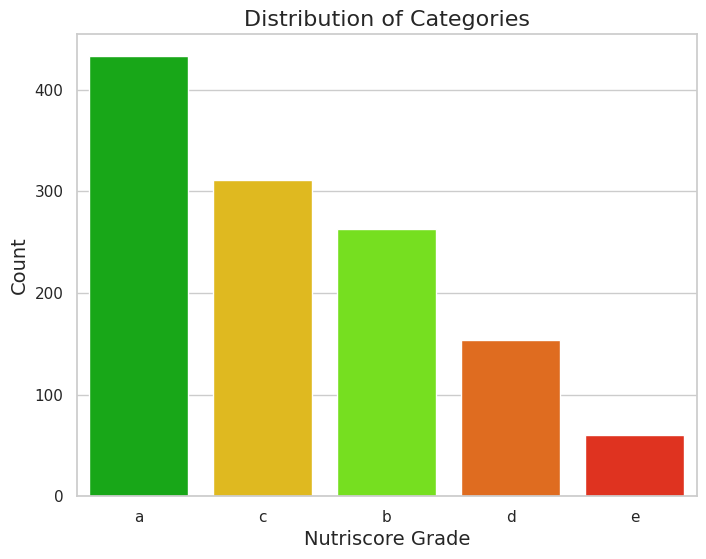

In [6]:
grade_counts = df['nutriscore_grade'].value_counts()
category_colors = {"a": "#00BF00", "b": "#73FF00", "c": "#FFCC00", "d": "#FF6600", "e": "#FF1900"}

sns.set(style='whitegrid')

plt.figure(figsize=(8,6))

sns.countplot(x='nutriscore_grade', data=df, order=grade_counts.index, palette=category_colors)

plt.xlabel('Nutriscore Grade', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Categories', fontsize=16)

plt.show()

### Distribution of Nutriscore grade

In [16]:
df.columns

Index(['url', 'product_name', 'categories', 'countries_fr', 'nutriscore_score',
       'nutriscore_grade', 'food_groups_tags', 'image_url', 'energy_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'fruits-vegetables-nuts_100g'],
      dtype='object')

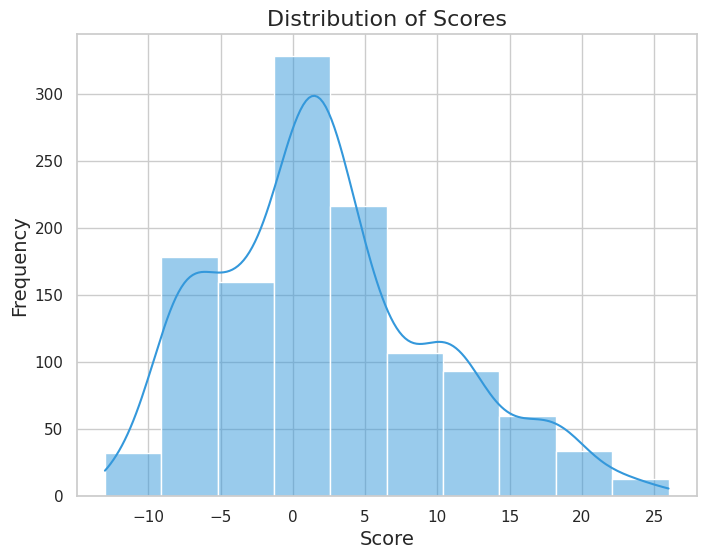

In [17]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot a histogram for the 'score' column
plt.figure(figsize=(8, 6))  # Set the figure size

# Customize the histogram appearance
sns.histplot(df['nutriscore_score'], bins=10, kde=True, color='#3498db')  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Scores', fontsize=16)

# Show the plot
plt.show()


## Electre-tri method

#### Using the current classification to the grades as basis for the borders (limiting profiles) of Eletre-Tri

In [25]:
df.columns

Index(['url', 'product_name', 'categories', 'countries_fr', 'nutriscore_score',
       'nutriscore_grade', 'food_groups_tags', 'image_url', 'energy_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'fruits-vegetables-nuts_100g'],
      dtype='object')

In [26]:
agg_dict = {'energy_100g': ['max', 'min'],
            'saturated-fat_100g': ['max', 'min'],
            'sugars_100g': ['max', 'min'],
            'fiber_100g': ['max', 'min'],
            'proteins_100g': ['max', 'min'],
            'salt_100g': ['max', 'min'],
            'fruits-vegetables-nuts_100g': ['max', 'min']}

result = df.groupby('nutriscore_grade').agg(agg_dict)

In [29]:
result

energy_100g        saturated-fat_100g      sugars_100g       \
                         max    min                max  min         max  min   
nutriscore_grade                                                               
a                     1636.0   51.0                3.0  0.0       27.00  0.0   
b                     2216.0   49.0                6.9  0.0       47.40  0.0   
c                     3766.0   34.0                9.5  0.0       33.02  0.0   
d                     2590.0  119.0               36.0  0.0       97.00  0.0   
e                     3024.0  128.0               23.0  0.0       44.00  0.0   

                 fiber_100g      proteins_100g      salt_100g       \
                        max  min           max  min       max  min   
nutriscore_grade                                                     
a                      23.0  0.0          28.0  0.0       1.2  0.0   
b                       6.5  0.0          23.0  0.0       1.4  0.0   
c                       7.0  0.0          21.0  0.0       4.0  0.0   
d                       5.2  0.0          25.0  0.0       3.1  0.0   
e                      32.0  0.0          24.0  0.0       1.6  0.0   

                 fruits-vegetables-nuts_100g       
                                         max  min  
nutriscore_grade                                   
a                                      100.0  0.0  
b                                      100.0  0.0  
c                                      100.0  0.0  
d                                       70.0  0.0  
e                                      100.0  0.0

/tmp/ipykernel_61788/2137045778.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'nutriscore_grade', y=criterias[i-1], data=df, order=["a","b","c","d","e"], palette=category_colors)
/tmp/ipykernel_61788/2137045778.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'nutriscore_grade', y=criterias[i-1], data=df, order=["a","b","c","d","e"], palette=category_colors)
/tmp/ipykernel_61788/2137045778.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'nutriscore_grade', y=criterias[i-1], data=df, order=["a","b","c","d","e"], palet

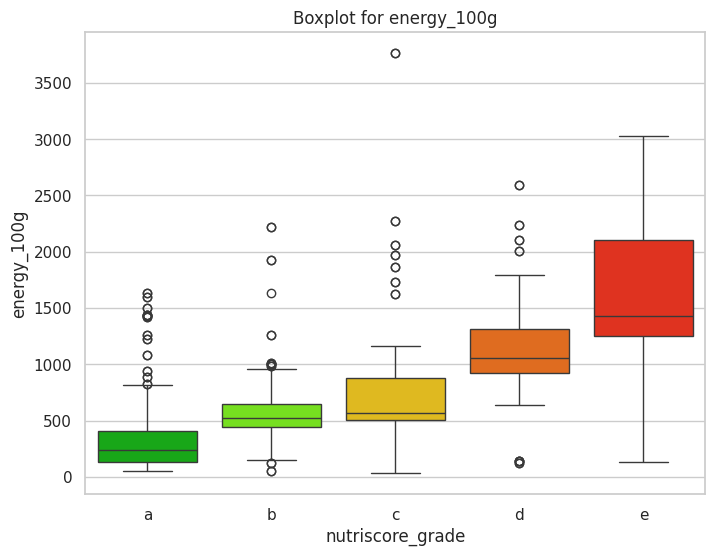

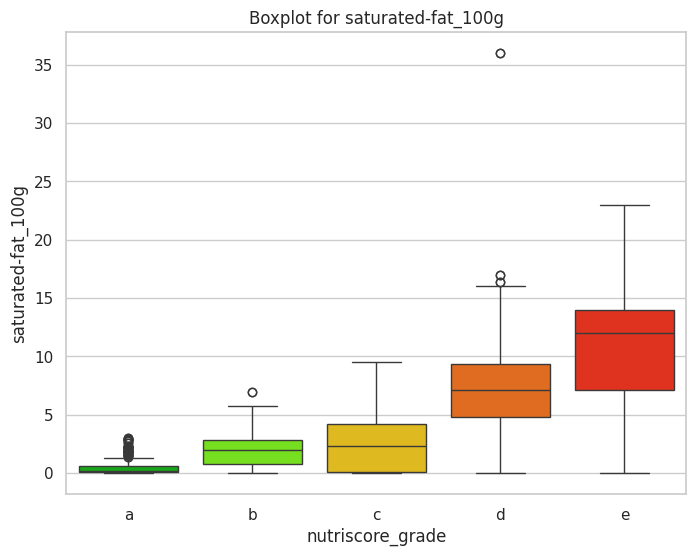

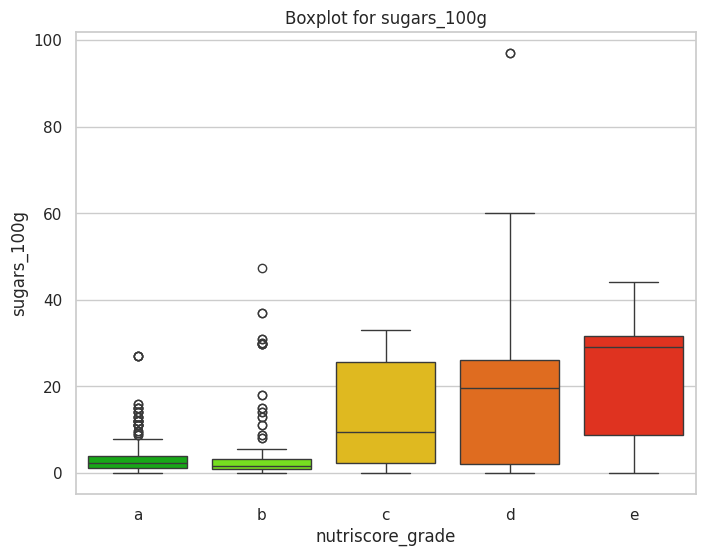

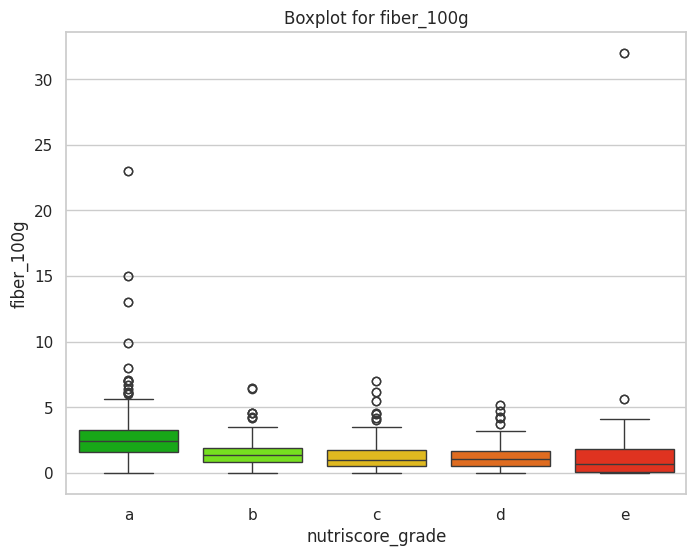

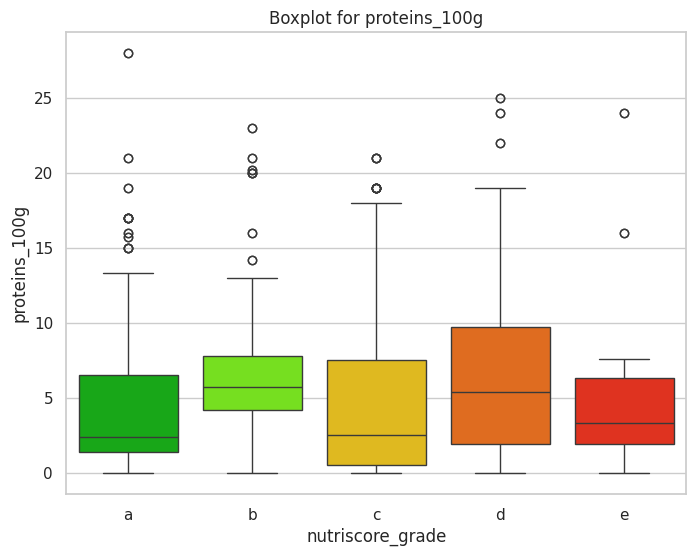

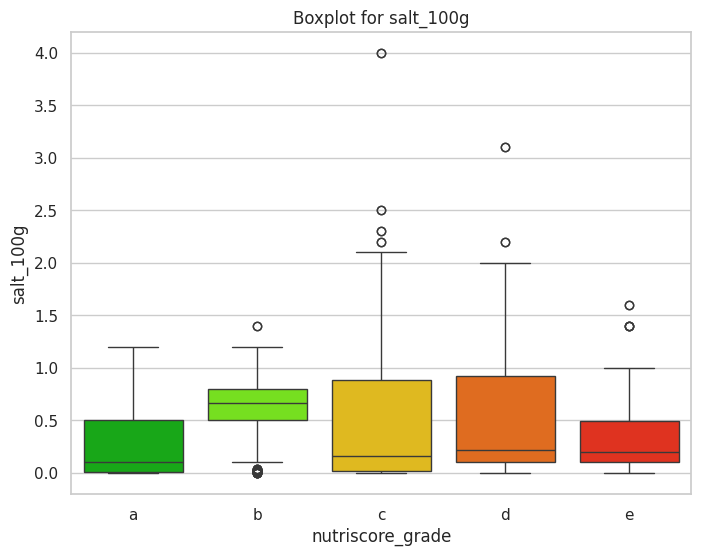

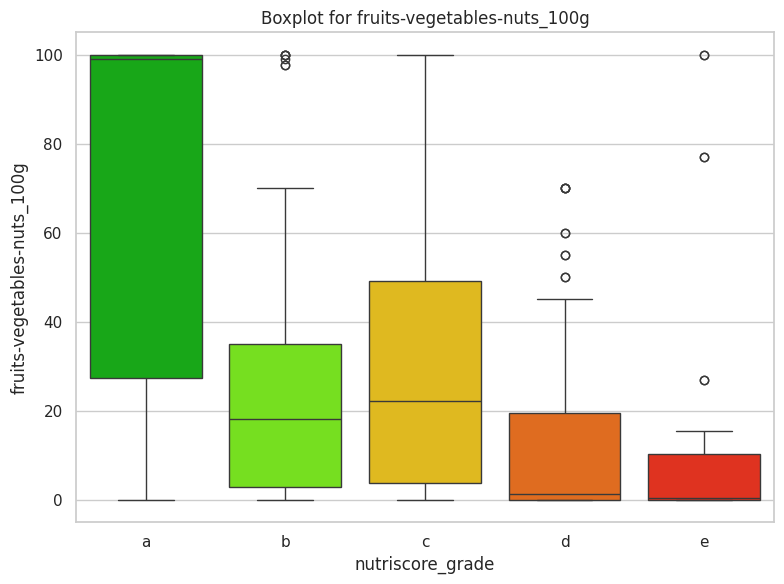

In [37]:
# Plotting box plots for each of the criterias
criterias = list(agg_dict.keys())

for i in range(1, 8):
    plt.figure(figsize=(8,6))
    sns.boxplot(x = 'nutriscore_grade', y=criterias[i-1], data=df, order=["a","b","c","d","e"], palette=category_colors)
    plt.title(f'Boxplot for {criterias[i-1]}')

plt.tight_layout()
plt.show()

## Getting borders for the Electre-tri method

In [7]:
for grade in ['a','b','c','d','e']:
    print(grade)
    print(df.loc[df['nutriscore_grade'] == grade]['energy_100g'].quantile([0.25, 0.5, 0.75]))

a
0.25    128.0
0.50    235.0
0.75    406.0
Name: energy_100g, dtype: float64
b
0.25    441.5
0.50    520.0
0.75    651.0
Name: energy_100g, dtype: float64
c
0.25    501.0
0.50    570.0
0.75    878.5
Name: energy_100g, dtype: float64
d
0.25     924.25
0.50    1054.50
0.75    1313.00
Name: energy_100g, dtype: float64
e
0.25    1248.00
0.50    1431.00
0.75    2100.75
Name: energy_100g, dtype: float64


In [8]:
weights = {
    "energy_100g":1, "sugars_100g":1, "saturated-fat_100g":1, "salt_100g": 1, 
    "proteins_100g":2, "fiber_100g": 2, "fruits-vegetables-nuts_100g":2}

In [23]:
# Function to find optimal threshold using ROC analysis
def find_optimal_threshold(data, labels):
    # Map class labels to integers
    label_mapping = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}
    y_true = np.array([label_mapping[label] for label in labels])

    # Split the data into train and test sets
    X_train, _, y_train, _ = train_test_split(data, y_true, test_size=0.01, random_state=42)

    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(np.unique(y_true))):
        y_true_i = (y_true == i).astype(int)
        fpr[i], tpr[i], _ = roc_curve(y_true_i, data)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Find the threshold that maximizes the sum of sensitivity and specificity
    optimal_thresholds = np.zeros(len(np.unique(y_true)))
    for i in range(len(np.unique(y_true))):
        optimal_thresholds[i] = X_train[y_train == i].mean()

    return optimal_thresholds

/tmp/ipykernel_16086/1588770306.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='nutriscore_grade', y=column, data=df, order=["a", "b", "c", "d", "e"], palette=category_colors, ax=axes[i])
/tmp/ipykernel_16086/1588770306.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='nutriscore_grade', y=column, data=df, order=["a", "b", "c", "d", "e"], palette=category_colors, ax=axes[i])
/tmp/ipykernel_16086/1588770306.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='nutriscore_grade', y=column, data=df, order=["a", "b", "c", "d", "e

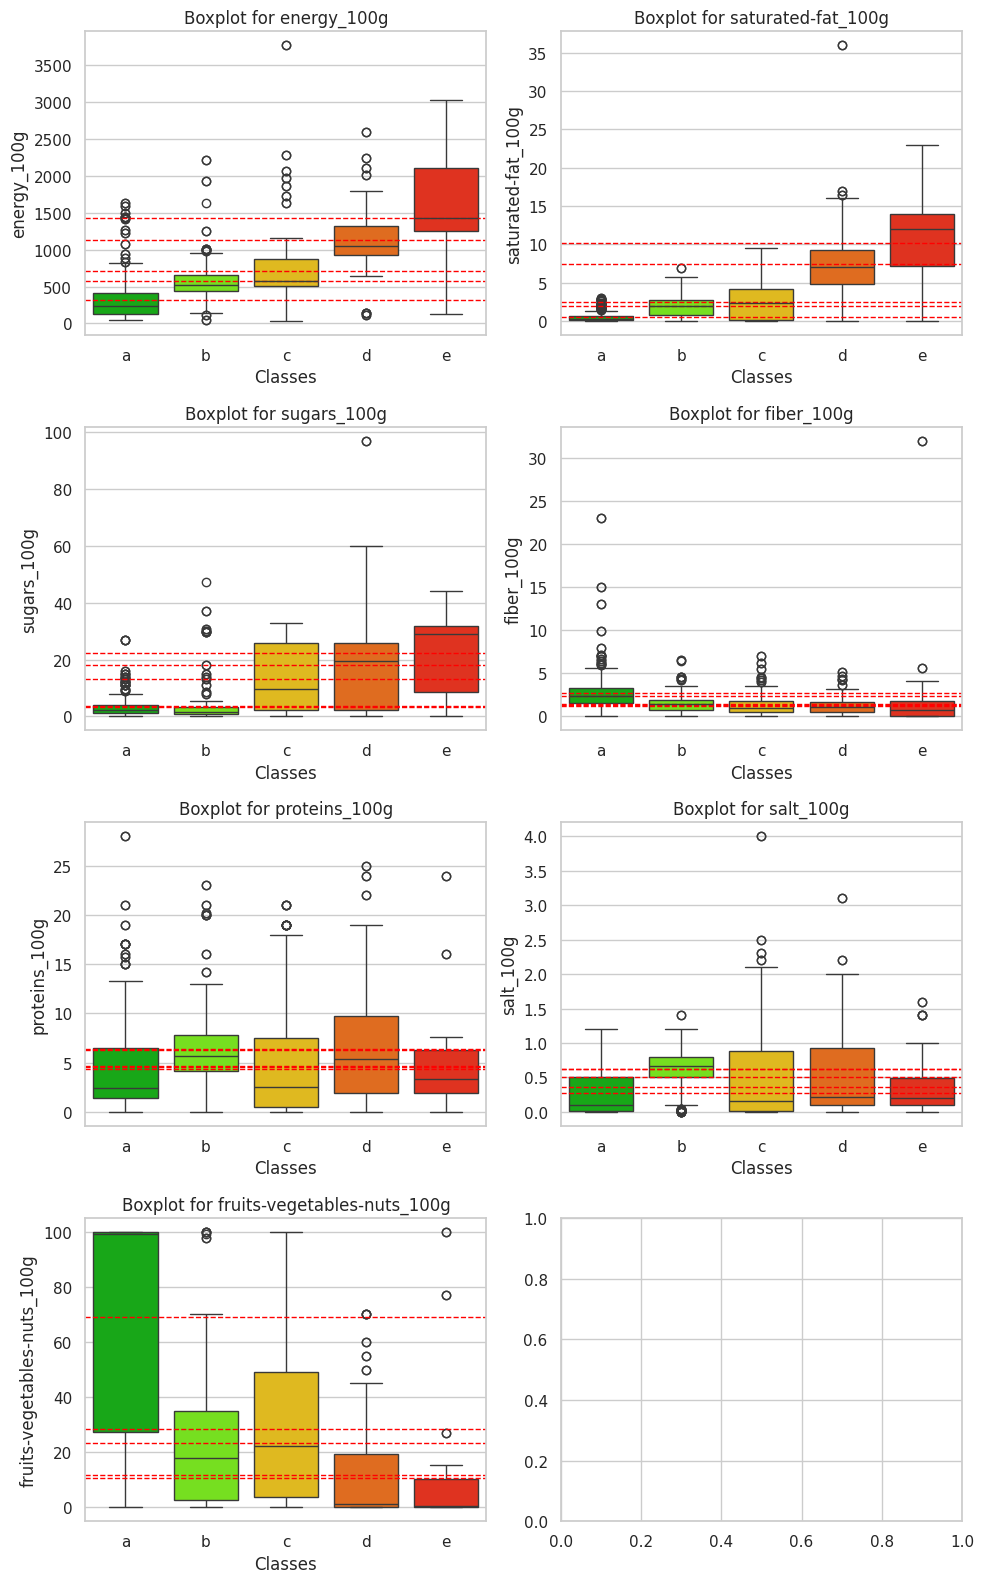

In [24]:
# Find borders for energy
columns = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g',
           'proteins_100g', 'salt_100g', 'fruits-vegetables-nuts_100g']
labels = df['nutriscore_grade']

# Create a 2x4 subplot grid
fig, axes = plt.subplots(4,2, figsize=(10,16))
axes = axes.flatten()

thresholds = {}

for i, column in enumerate(columns):
    data = df[column]

    # Find optimal thresholds
    optimal_threshold = find_optimal_threshold(data, labels)
    thresholds[column] = optimal_threshold

    # Plot boxplot
    sns.boxplot(x='nutriscore_grade', y=column, data=df, order=["a", "b", "c", "d", "e"], palette=category_colors, ax=axes[i])

    for line in optimal_threshold:
        # Plot decision boundary
        axes[i].axhline(y=line, color='red', linestyle='dashed', linewidth=1)

    axes[i].set_title(f'Boxplot for {column}')
    axes[i].set_xlabel('Classes')
    axes[i].set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [32]:
## Sort the borders either in descending or ascending order
for key, value in thresholds.items():
    value = [round(v, 2) for v in value]
    thresholds[key] = list(value)

thresholds["energy_100g"].sort()
thresholds["saturated-fat_100g"].sort()
thresholds["sugars_100g"].sort()
thresholds["salt_100g"].sort()
thresholds["fiber_100g"].sort(reverse=True)
thresholds["proteins_100g"].sort(reverse=True)
thresholds["fruits-vegetables-nuts_100g"].sort(reverse=True)

## Electre-tri method

In [1]:
## Electre-tri method